# Approximate Rate Examples

In [1]:
import pynucastro as pyna

Let's create a simple network that has both an $(\alpha, \gamma)$ and
$(\alpha, p)(p, \gamma)$ sequence.

In [2]:
reaclib_library = pyna.ReacLibLibrary()

In [3]:
mylib = reaclib_library.linking_nuclei(["mg24", "al27", "si28", "p31", "s32", "he4", "p"])

In [4]:
rc = pyna.RateCollection(libraries=[mylib])

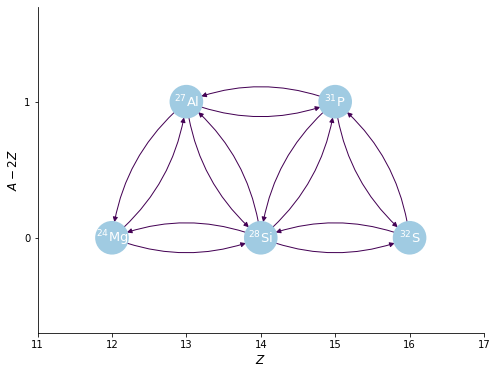

In [5]:
rc.plot(rotated=True, curved_edges=True)

In [6]:
comp = pyna.Composition(rc.get_nuclei())
comp.set_all(1.0)
comp.normalize()

In [7]:
print(comp)

  X(p) : 0.14285714285714285
  X(he4) : 0.14285714285714285
  X(mg24) : 0.14285714285714285
  X(al27) : 0.14285714285714285
  X(si28) : 0.14285714285714285
  X(p31) : 0.14285714285714285
  X(s32) : 0.14285714285714285



In [8]:
rho = 1.e6
T = 3.e9
ydots = rc.evaluate_ydots(rho, T, comp)

In [9]:
ydots

{p: -247340941.92231065,
 he4: 238229731.30103156,
 mg24: 104226018.28986953,
 al27: -111499543.67428398,
 si28: 141277238.39557648,
 p31: -135841398.24802667,
 s32: 1837685.2368646432}

## Approximating

In [10]:
print(rc)

Si28 ⟶ p + Al27
Si28 ⟶ He4 + Mg24
P31 ⟶ He4 + Al27
S32 ⟶ p + P31
S32 ⟶ He4 + Si28
Mg24 + He4 ⟶ Si28 + 𝛾
Al27 + p ⟶ Si28 + 𝛾
Al27 + He4 ⟶ P31 + 𝛾
Si28 + He4 ⟶ S32 + 𝛾
P31 + p ⟶ S32 + 𝛾
Mg24 + He4 ⟶ p + Al27
Al27 + p ⟶ He4 + Mg24
Si28 + He4 ⟶ p + P31
P31 + p ⟶ He4 + Si28



In [11]:
rp = rc.get_rate("he4_mg24__si28")
rs = [rc.get_rate("he4_mg24__p_al27"), rc.get_rate("p_al27__si28")]

In [12]:
rs

[Mg24 + He4 ⟶ p + Al27, Al27 + p ⟶ Si28 + 𝛾]

In [13]:
rp_reverse = rc.get_rate("si28__he4_mg24")
rs_reverse = [rc.get_rate("si28__p_al27"), rc.get_rate("p_al27__he4_mg24")]

In [14]:
ar = pyna.ApproximateRate(primary_rate=rp, secondary_rates=rs,
                          primary_reverse=rp_reverse, secondary_reverse=rs_reverse)

In [15]:
ar.fname

'mg24_he4__si28'

## evaluate

at low T, the reverse rates should be insignificant and our approximate rate should reduce to the sum of $(\alpha, \gamma)$ and $(\alpha, p)$

In [16]:
T = 1.e9

In [17]:
ar.eval(T)

0.0008099307826081986

In [18]:
rp.eval(T) + rs[0].eval(T)

0.0008118513074816655

at high T, the approximate rate will be lower because we start to see the effect of the reverse rate consuming the protons

In [19]:
T = 2.e9

In [20]:
ar.eval(T)

1.2493589240464626

In [21]:
rp.eval(T) + rs[0].eval(T)

3.6337850135767833

In [22]:
rs[0].eval(T)

2.7769870580356923

In [23]:
rs[1].eval(T)

2764.8859864765686

In [24]:
rs_reverse[1].eval(T)

16793.993314802243

# Redo the RateCollection

In [25]:
rc.make_ap_pg_approx()

using approximate rate Mg24 + He4 ⟶ Si28 + 𝛾
using approximate rate Si28 ⟶ Mg24 + He4
using approximate rate Si28 + He4 ⟶ S32 + 𝛾
using approximate rate S32 ⟶ Si28 + He4
removing rate Mg24 + He4 ⟶ Si28 + 𝛾
removing rate Mg24 + He4 ⟶ p + Al27
removing rate Al27 + p ⟶ Si28 + 𝛾
removing rate Si28 ⟶ He4 + Mg24
removing rate Si28 ⟶ p + Al27
removing rate Al27 + p ⟶ He4 + Mg24
removing rate Si28 + He4 ⟶ S32 + 𝛾
removing rate Si28 + He4 ⟶ p + P31
removing rate P31 + p ⟶ S32 + 𝛾
removing rate S32 ⟶ He4 + Si28
removing rate S32 ⟶ p + P31
removing rate P31 + p ⟶ He4 + Si28


In [26]:
rc

P31 ⟶ He4 + Al27
Al27 + He4 ⟶ P31 + 𝛾
Mg24 + He4 ⟶ Si28 + 𝛾
Si28 ⟶ Mg24 + He4
Si28 + He4 ⟶ S32 + 𝛾
S32 ⟶ Si28 + He4

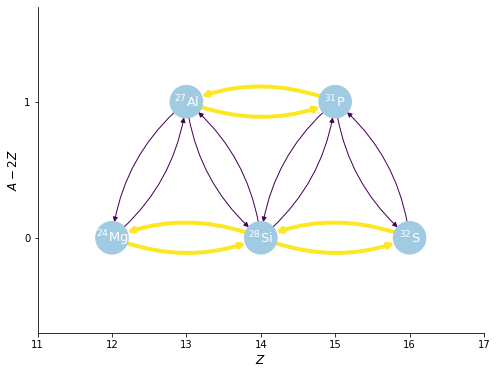

In [27]:
rc.plot(rotated=True, curved_edges=True)

now remove the isolated Al27 and P31 nuclei

In [28]:
rc.remove_nuclei([pyna.Nucleus("al27"), pyna.Nucleus("p31")])

looking to remove P31 ⟶ He4 + Al27
looking to remove Al27 + He4 ⟶ P31 + 𝛾
looking to remove P31 ⟶ He4 + Al27
looking to remove Al27 + He4 ⟶ P31 + 𝛾


In [29]:
rc

Mg24 + He4 ⟶ Si28 + 𝛾
Si28 ⟶ Mg24 + He4
Si28 + He4 ⟶ S32 + 𝛾
S32 ⟶ Si28 + He4

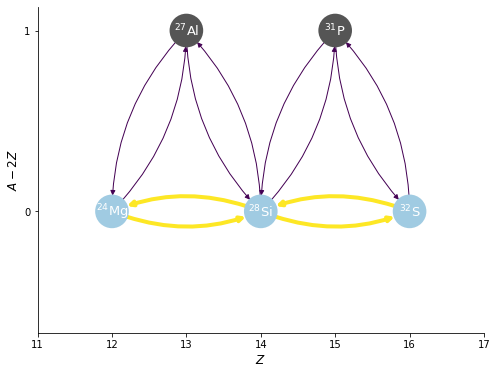

In [30]:
rc.plot(rotated=True, curved_edges=True)